In [1]:
# plot
#outlier
#lagplot
#Autocorrelation--- ACF and PACF
#Stationarity Check --need to convert if it not stationary
#Transforming Time series---to remove noise and imporve the signal---to make the data linear---
###Square root transform /log transform(exp to linear)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
oil=pd.read_excel('Brent.xls', index_col=[0],parse_dates = [0] )
oil.head(10)

,SpotPrice
Date,
2016-10-03,48.61
2016-10-04,48.81
2016-10-05,49.57
2016-10-06,50.14
2016-10-07,50.49
2016-10-10,51.54
2016-10-11,50.48
2016-10-12,49.53
2016-10-13,49.29


In [5]:
oil.tail(10)

,SpotPrice
Date,
2021-11-09,84.52
2021-11-10,82.91
2021-11-11,83.40
2021-11-12,82.90
2021-11-15,81.94
2021-11-16,82.85
2021-11-17,80.67
2021-11-18,82.45
2021-11-19,80.24


In [6]:
type(oil)

pandas.core.frame.DataFrame

In [7]:
# Converting into series
series_value = oil.values
series_value

array([[48.61],
       [48.81],
       [49.57],
       ...,
       [82.45],
       [80.24],
       [80.97]])

In [8]:
#type(series_value)

In [9]:
oil.size

1309

In [10]:
oil.describe()

,SpotPrice
count,1309.000000
mean,59.626753
std,13.479875
min,9.120000
25%,50.960000
50%,61.500000
75%,69.290000
max,86.070000


### Visualization

<AxesSubplot:xlabel='Date'>

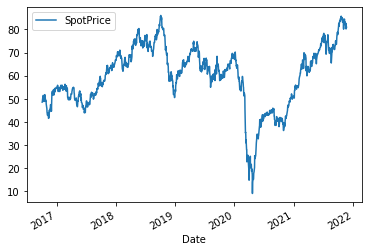

In [11]:
oil.plot()

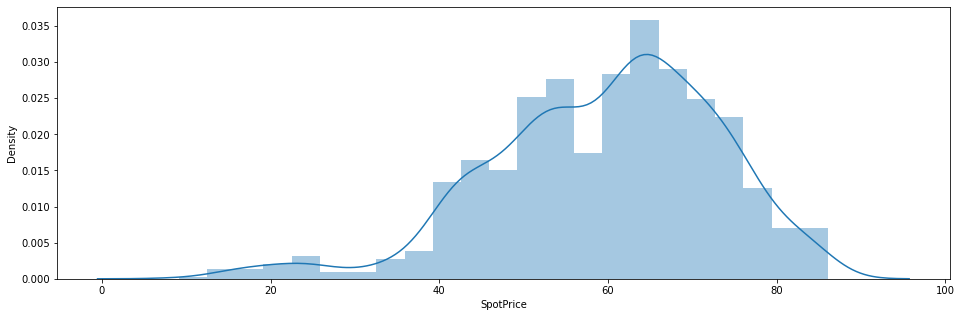

In [12]:
plt.figure(figsize=(16,5))
sns.distplot(oil['SpotPrice'])
plt.show()

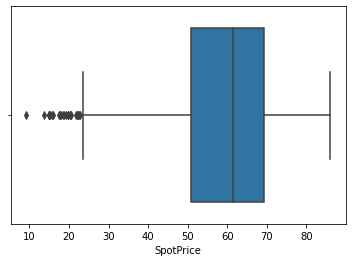

In [13]:
sns.boxplot(oil['SpotPrice'])
plt.show()

## Treating Outlier 

In [14]:
for i in oil:
    oil[i],lmbda=boxcox(oil[i], lmbda=None)

In [15]:
oil

,SpotPrice
Date,
2016-10-03,553.397368
2016-10-04,557.447404
2016-10-05,572.954788
2016-10-06,584.706869
2016-10-07,591.974553
...,...
2021-11-16,1426.055451
2021-11-17,1360.137800
2021-11-18,1413.858611


<AxesSubplot:ylabel='Density'>

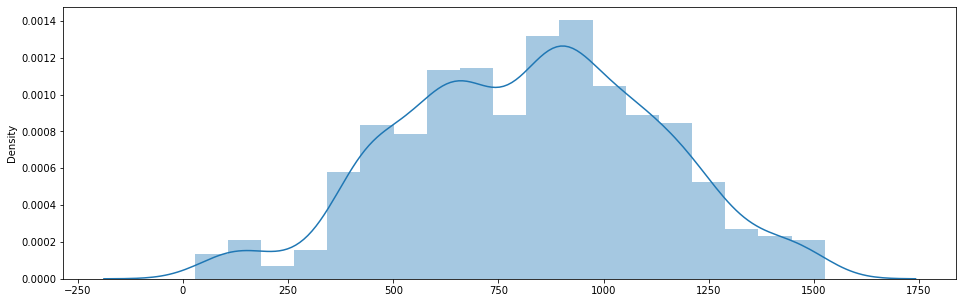

In [16]:
plt.figure(figsize=(16,5))
sns.distplot(oil)

<AxesSubplot:xlabel='SpotPrice'>

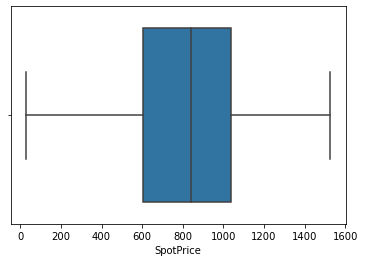

In [17]:
sns.boxplot(oil['SpotPrice'])

<AxesSubplot:xlabel='Date'>

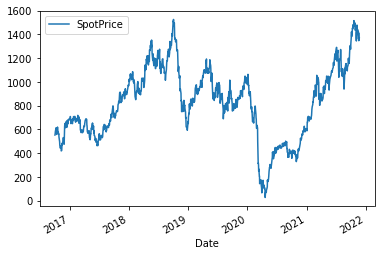

In [18]:
oil.plot()

In [19]:
oil.describe()

,SpotPrice
count,1309.000000
mean,823.731916
std,302.271393
min,27.891912
25%,601.795519
50%,840.260687
75%,1038.391780
max,1525.899416


### Data Normalization
A scaler, in machine learning is a tool that uses a range and set all values that you pass to it within data range. The code belows handles that.

In [20]:
#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#dataset = min_max_scaler.fit_transform(oil.SpotPrice.values.reshape(-1, 1))
#dataset[0:10]

### Lagplot

In [21]:
oil

,SpotPrice
Date,
2016-10-03,553.397368
2016-10-04,557.447404
2016-10-05,572.954788
2016-10-06,584.706869
2016-10-07,591.974553
...,...
2021-11-16,1426.055451
2021-11-17,1360.137800
2021-11-18,1413.858611


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

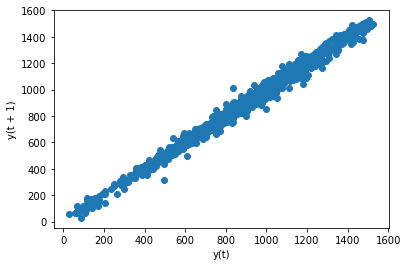

In [22]:
from pandas.plotting import lag_plot

lag_plot(oil['SpotPrice'])

### ACF and PACF plot

In [23]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(oil['SpotPrice'].iloc[6:],lags=12)
#ax1 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(oil['SpotPrice'].iloc[6:],lags=12)

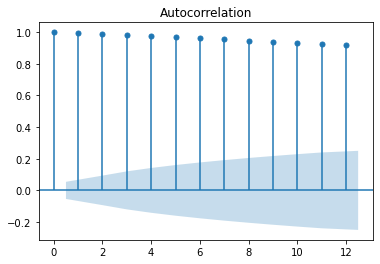

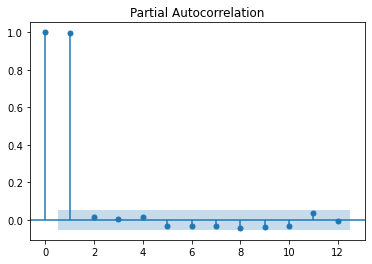

In [25]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(oil['SpotPrice'],lags=12)
tsa_plots.plot_pacf(oil['SpotPrice'],lags=12)
plt.show()

### Decomposition plot

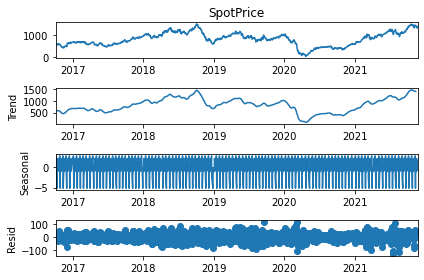

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(oil['SpotPrice'],period=12,model='additive')
decompose_ts_add.plot()
plt.show()

### Stationarity Check
- Method 1 - Rolling Statistics
- Method 2 - Dicky Fuller

In [27]:
 def test_stationarity(timeseries):
    """ Fucntion to plot the moving variance and apply Dickey Fuller Test"""
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center=False).std()
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original Time Series Data')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value' ,'#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
        
    
    print(dfoutput)

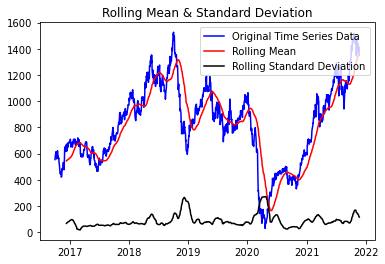

Results of Dickey-Fuller Test:

Test Statistics                  -1.464224
p-value                           0.551129
#Lags Used                        0.000000
Number of Observations Used    1308.000000
Critical Value 1%                -3.435359
Critical Value 5%                -2.863752
Critical Value 10%               -2.567948
dtype: float64


In [28]:
test_stationarity(oil)

In [29]:
## differencing

In [30]:
oil_diff= oil['SpotPrice'] - oil['SpotPrice'].shift(1)
oil_diff

Date
2016-10-03          NaN
2016-10-04     4.050036
2016-10-05    15.507384
2016-10-06    11.752081
2016-10-07     7.267684
                ...    
2021-11-16    27.681494
2021-11-17   -65.917651
2021-11-18    53.720812
2021-11-19   -66.562034
2021-11-22    21.831664
Name: SpotPrice, Length: 1309, dtype: float64

In [31]:
oil_diff.dropna()

Date
2016-10-04     4.050036
2016-10-05    15.507384
2016-10-06    11.752081
2016-10-07     7.267684
2016-10-10    22.037441
                ...    
2021-11-16    27.681494
2021-11-17   -65.917651
2021-11-18    53.720812
2021-11-19   -66.562034
2021-11-22    21.831664
Name: SpotPrice, Length: 1308, dtype: float64

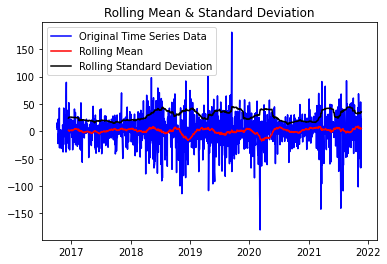

Results of Dickey-Fuller Test:

Test Statistics                 -26.645003
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1306.000000
Critical Value 1%                -3.435367
Critical Value 5%                -2.863756
Critical Value 10%               -2.567950
dtype: float64


In [32]:
oil_diff.dropna(inplace=True)
test_stationarity(oil_diff)

In [33]:
### log transformation

In [34]:
#oil_log = np.log(oil)
#oil_log_diff = oil_log - oil_log.shift()
#_ = plt.plot(oil_log_diff)

In [35]:
#oil_log_diff.dropna(inplace=True)
#test_stationarity(oil_log_diff)

<AxesSubplot:xlabel='Date'>

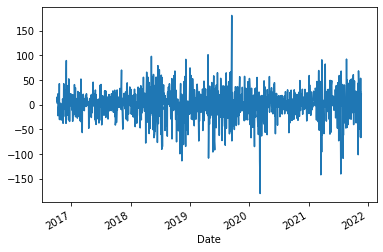

In [36]:
oil_diff.plot()

In [37]:
#TestStationary.Plot(oil_diff)

### Decomposition plot after differencing

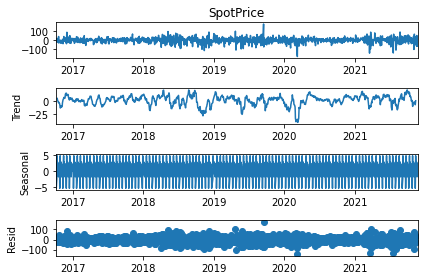

In [38]:
decompose_ts_add = seasonal_decompose(oil_diff.dropna(),period=12)
decompose_ts_add.plot()
plt.show()

### ACF and PACF plot after differencing

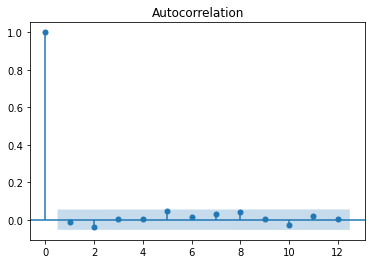

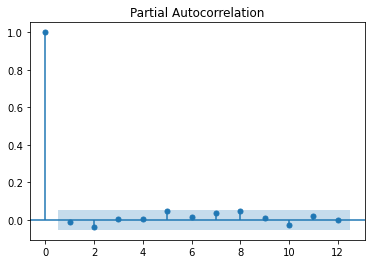

In [39]:
tsa_plots.plot_acf(oil_diff.dropna(),lags=12)
tsa_plots.plot_pacf(oil_diff.dropna(),lags=12)
plt.show()

In [40]:
oil

,SpotPrice
Date,
2016-10-03,553.397368
2016-10-04,557.447404
2016-10-05,572.954788
2016-10-06,584.706869
2016-10-07,591.974553
...,...
2021-11-16,1426.055451
2021-11-17,1360.137800
2021-11-18,1413.858611


In [41]:
oil_diff

Date
2016-10-04     4.050036
2016-10-05    15.507384
2016-10-06    11.752081
2016-10-07     7.267684
2016-10-10    22.037441
                ...    
2021-11-16    27.681494
2021-11-17   -65.917651
2021-11-18    53.720812
2021-11-19   -66.562034
2021-11-22    21.831664
Name: SpotPrice, Length: 1308, dtype: float64

In [42]:
#p--pACF---0    d--differenin---1 q---acf---0  order 010

### ARIMA Model

In [43]:
#p=0 , d= 1, q = 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [44]:
model = ARIMA(oil_diff, order = (0,1,0))
model_fit = model.fit()

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.SpotPrice   No. Observations:                 1307
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6766.075
Method:                           css   S.D. of innovations             42.857
Date:                Wed, 05 Jan 2022   AIC                          13536.150
Time:                        18:23:03   BIC                          13546.501
Sample:                             1   HQIC                         13540.032
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0136      1.185      0.011      0.991      -2.310       2.337
==============================================================================
"""

In [46]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [47]:
for param in pdq:
    try:
        model_arima = ARIMA(oil_diff.dropna(),order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 12625.615162081944
(0, 0, 1) 12627.46280712684
(0, 0, 2) 12627.603253753003
(0, 0, 3) 12629.474849890143
(0, 0, 4) 12631.438158710316
(0, 1, 0) 13536.149603596075
(0, 1, 1) 12625.950294236116
(0, 1, 2) 12627.815968344616
(0, 1, 3) 12628.012884830272
(0, 1, 4) 12629.87127731256
(0, 2, 0) 14947.590905201345
(0, 2, 1) 13535.970519276327
(0, 2, 2) 12636.493364977116
(0, 2, 3) 12642.909023161174
(0, 2, 4) 12643.977218391063
(1, 0, 0) 12627.474368695766
(1, 0, 1) 12629.031042546894
(1, 0, 2) 12626.176183279375
(1, 0, 3) 12627.010409545413
(1, 0, 4) 12628.525684561937
(1, 1, 0) 13185.464316357098
(1, 1, 1) 12627.82598303833
(1, 1, 2) 12625.749426821281
(1, 1, 3) 12626.546001971303
(1, 1, 4) 12629.772523806929
(1, 2, 0) 14229.278185735526
(1, 2, 3) 12641.277878826952
(2, 0, 0) 12627.57121741348
(2, 0, 1) 12626.227141533305
(2, 0, 2) 12627.878361018857
(2, 0, 3) 12627.927384617684
(2, 0, 4) 12627.78246504491
(2, 1, 0) 13010.460914524065
(2, 1, 1) 12627.979661392385
(2, 1, 2) 12629.931

In [48]:
train_ar = oil_diff.head(1083)
test_ar = oil_diff.tail(226)

In [49]:
train_ar.index

DatetimeIndex(['2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13',
               '2016-10-14', '2016-10-17',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-04'],
              dtype='datetime64[ns]', name='Date', length=1083, freq=None)

In [50]:
test_ar.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-22'],
              dtype='datetime64[ns]', name='Date', length=226, freq=None)

In [51]:
train_ar = pd.DataFrame(train_ar)

In [52]:
train_ar

,SpotPrice
Date,
2016-10-04,4.050036
2016-10-05,15.507384
2016-10-06,11.752081
2016-10-07,7.267684
2016-10-10,22.037441
...,...
2020-12-28,0.000000
2020-12-29,-9.184974
2020-12-30,6.255785


<AxesSubplot:xlabel='Date'>

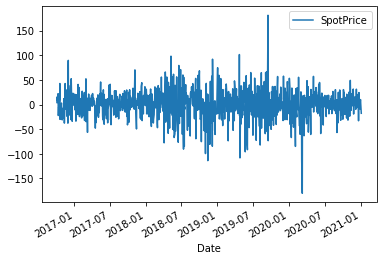

In [53]:
train_ar.plot()

<AxesSubplot:xlabel='Date'>

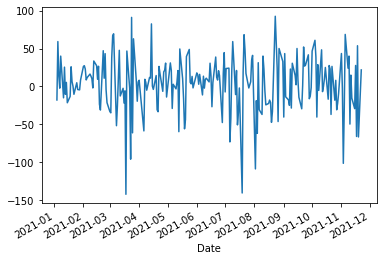

In [54]:
test_ar.plot()

### ARIMA MAPE 

In [55]:
from sklearn.metrics import mean_absolute_percentage_error

In [56]:
ARIMAmodel = ARIMA(train_ar, order=(0, 1, 0)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1083,1308,typ='levels')
mean_absolute_percentage_error(test_ar,ARIMA_pred)*100

4.339216468908904e+16

## Sarima

In [57]:
# Considering Seasonality in Arima it becomes SARIMA
import statsmodels.api as sm
SARIMAmodel = sm.tsa.statespace.SARIMAX(train_ar, order=(0,1,0),seasonal_order = (0,1,0,5))
SARIMA_model_fit = SARIMAmodel.fit()

In [58]:
print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         SpotPrice   No. Observations:                 1083
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 5)   Log Likelihood               -5889.938
Date:                           Wed, 05 Jan 2022   AIC                          11781.876
Time:                                   18:24:40   BIC                          11786.857
Sample:                                        0   HQIC                         11783.762
                                          - 1083                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3293.8082    100.117     32.899      0.000    3097.582    3490.035
Ljung-Box (L1) (Q):                 254.73 

In [60]:
train_ar.index

DatetimeIndex(['2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13',
               '2016-10-14', '2016-10-17',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-04'],
              dtype='datetime64[ns]', name='Date', length=1083, freq=None)

In [61]:
predict_train = SARIMA_model_fit.predict(start=pd.to_datetime('2016-10-04'),end=pd.to_datetime('2021-01-04'))

<AxesSubplot:xlabel='Date'>

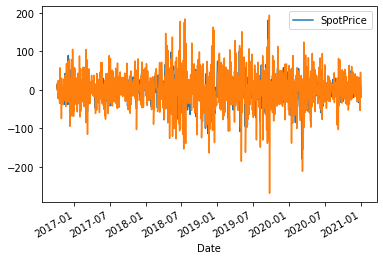

In [62]:
train_ar.plot()
predict_train.plot()

In [63]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(train_ar,predict_train)*100

1.630059835135477e+17

In [69]:
SARIMA_pred = SARIMA_model_fit.predict(1083,1308,typ='levels')

In [68]:
mean_absolute_percentage_error(test_ar,SARIMA_pred)*100

1.1206073510082845e+18